<a href="https://colab.research.google.com/github/0M3REXE/Machine-Learning/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [16]:
import pandas as pd
import urllib.request

url_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv(url_data, header=None, names=column_names)
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data[data.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
class,0


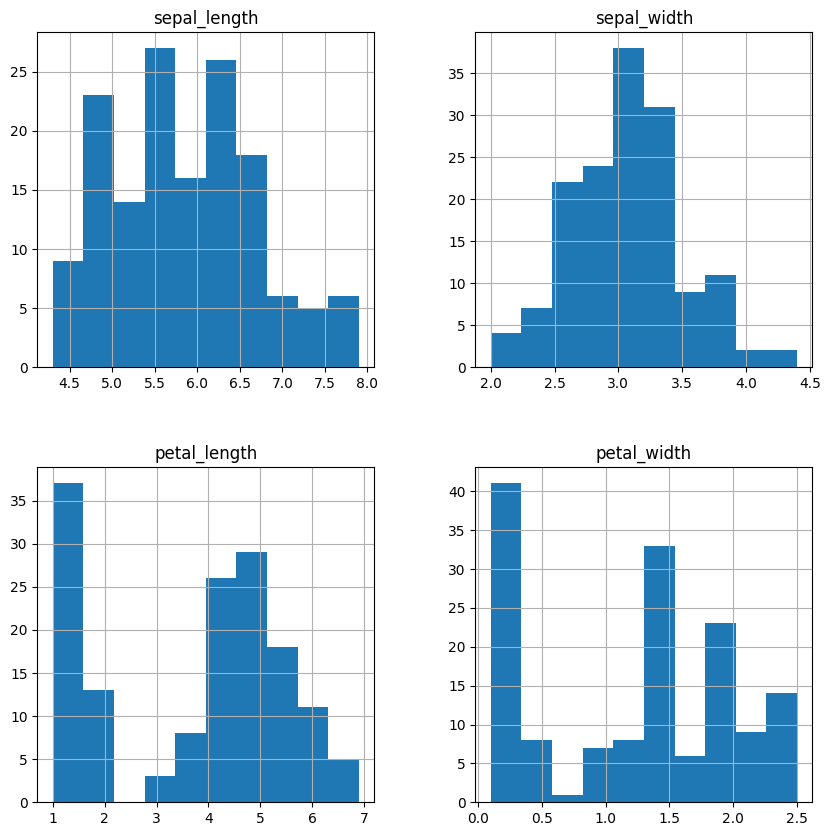

In [6]:
import matplotlib.pyplot as plt

data.hist(figsize=(10, 10))
plt.show()

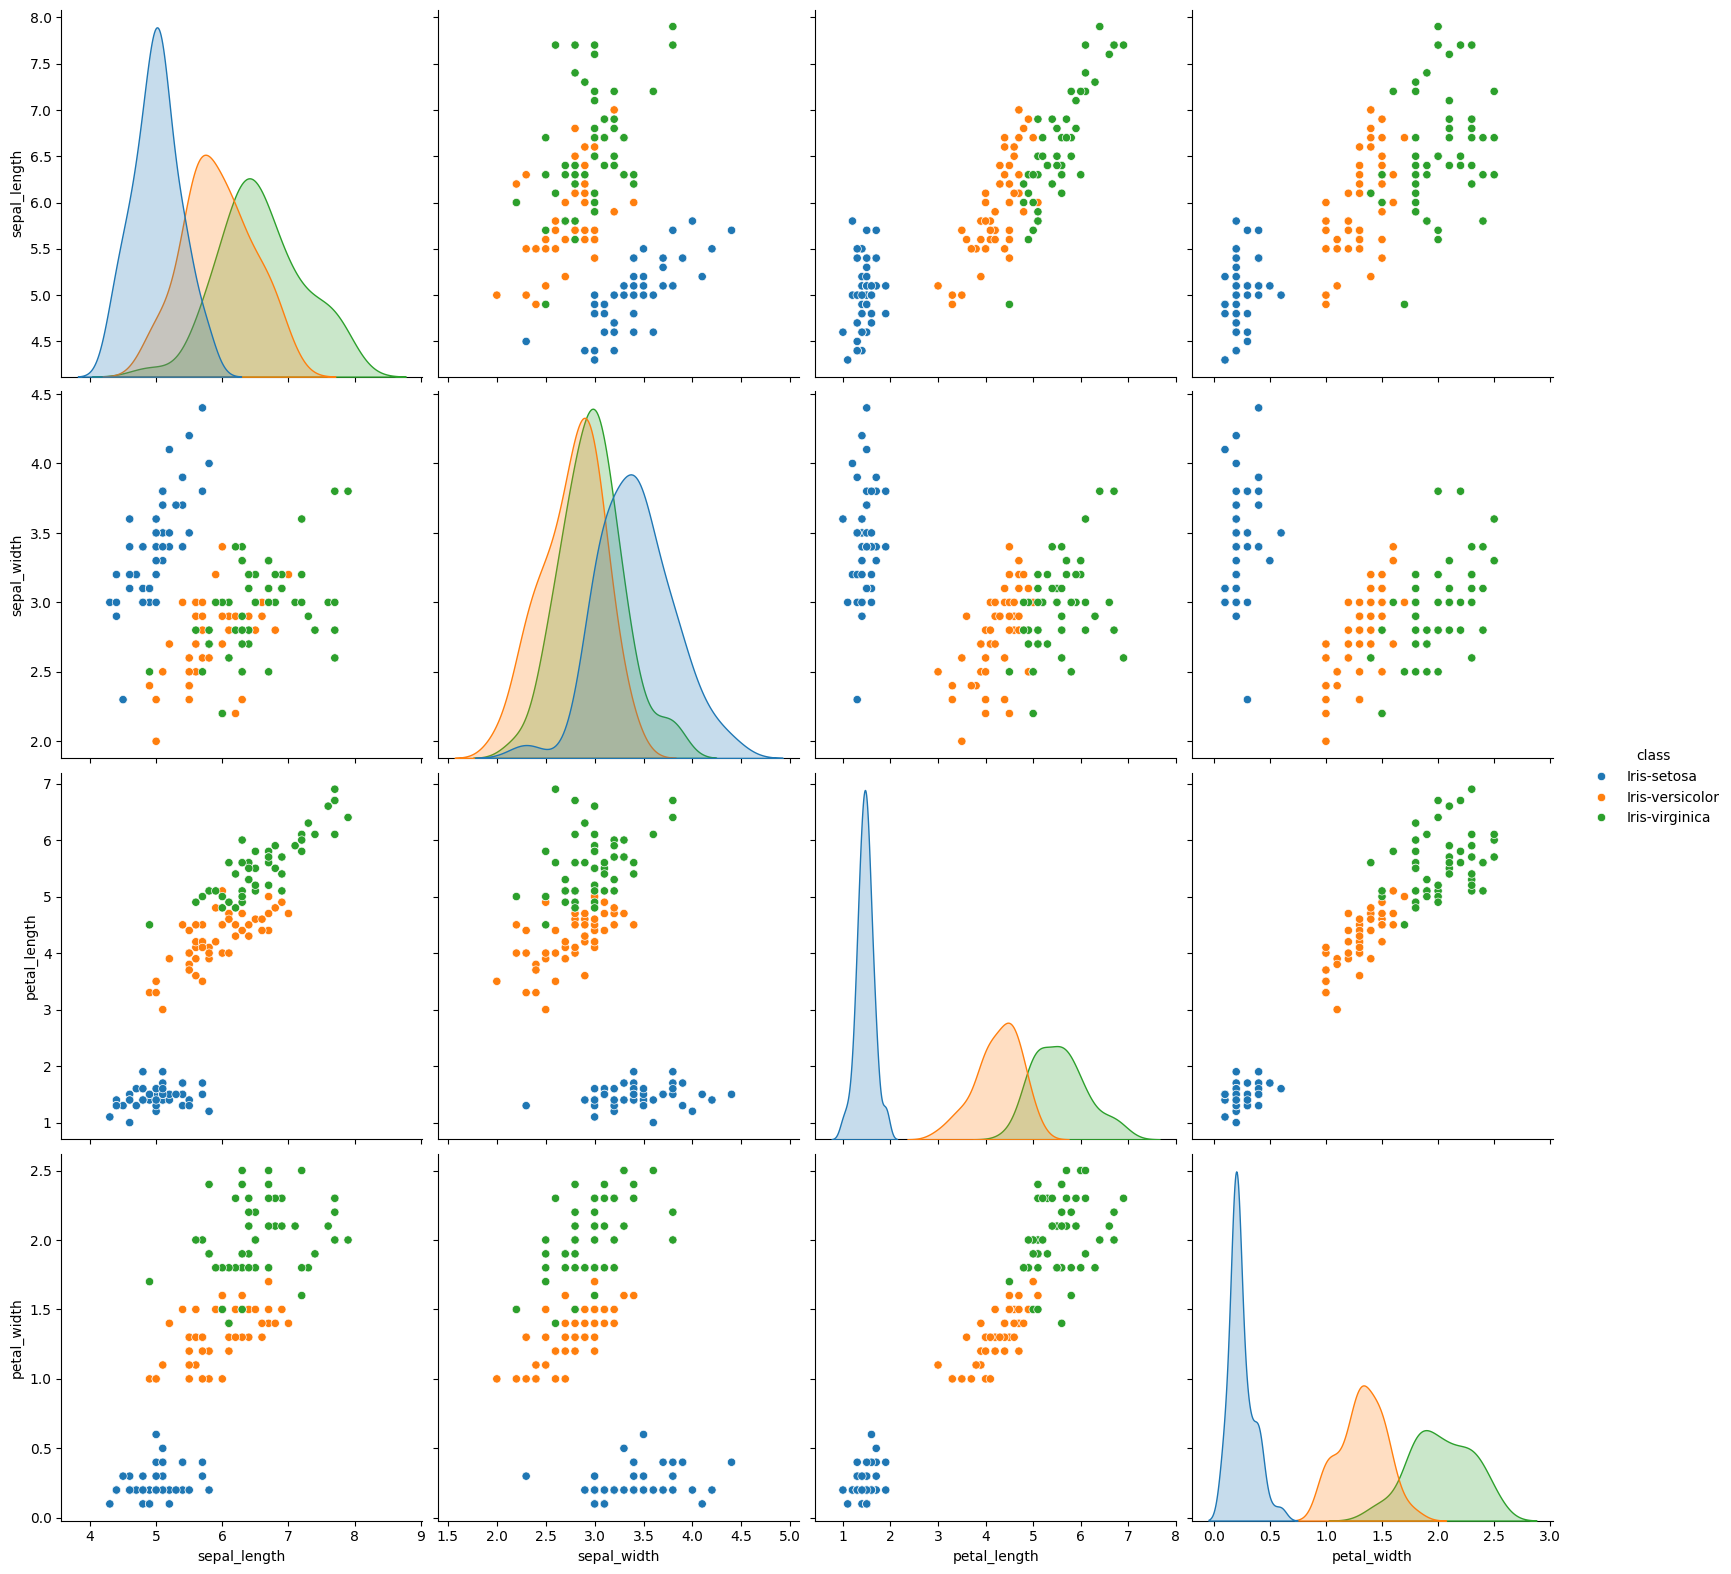

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data,hue="class",height=4)

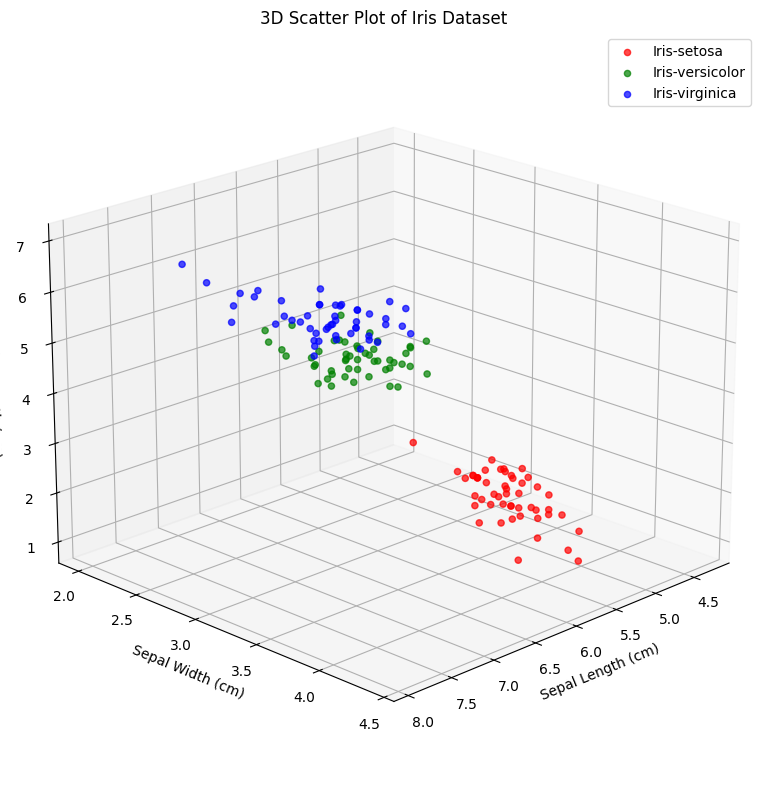

In [17]:
#Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


unique_classes = data['class'].unique()
color_map = {
    'Iris-setosa': 'red',
    'Iris-versicolor': 'green',
    'Iris-virginica': 'blue'
}

# Plot each class with a different color
for class_name, color in color_map.items():
    class_data = data[data['class'] == class_name]
    ax.scatter(
        class_data['sepal_length'],
        class_data['sepal_width'],
        class_data['petal_length'],
        c=color,
        label=class_name,
        alpha=0.7
    )

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.set_title('3D Scatter Plot of Iris Dataset')


ax.legend()

ax.view_init(20, 45)

plt.tight_layout()
plt.show()

In [7]:
ndata = pd.get_dummies(data, columns=['class'])
ndata

,sepal_length,sepal_width,petal_length,petal_width,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


In [10]:
from sklearn.model_selection import train_test_split



X = ndata.drop(columns=['class_Iris-setosa', 'class_Iris-versicolor', 'class_Iris-virginica'])
y = ndata[['class_Iris-setosa', 'class_Iris-versicolor', 'class_Iris-virginica']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 120
Test set size: 30


In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer (3 classes)
])

# 4. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9667 - loss: 0.1814
Test Accuracy: 96.67%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


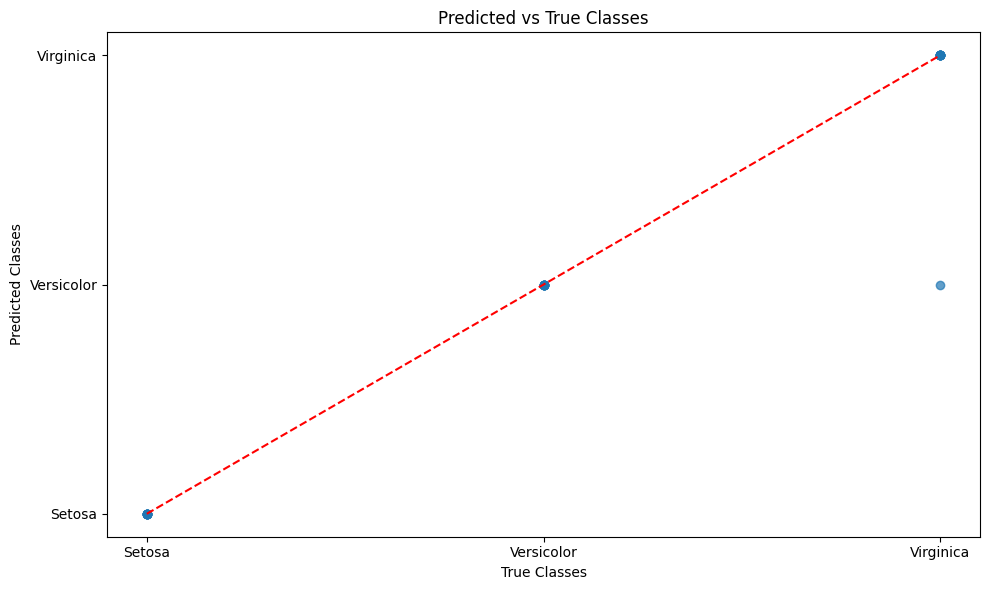

In [33]:
import numpy as np
# Make predictions
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test.values, axis=1)

# Visualize predictions vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_true_classes, y_pred_classes, alpha=0.7)
plt.plot([0, 2], [0, 2], color='red', linestyle='--')
plt.title('Predicted vs True Classes')
plt.xlabel('True Classes')
plt.ylabel('Predicted Classes')
plt.xticks([0, 1, 2], ['Setosa', 'Versicolor', 'Virginica'])
plt.yticks([0, 1, 2], ['Setosa', 'Versicolor', 'Virginica'])
plt.tight_layout()
plt.show()

In [34]:

# Detailed classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(
    y_true_classes,
    y_pred_classes,
    target_names=['Setosa', 'Versicolor', 'Virginica']
))

# Prediction probability for a few test samples
print("\nPrediction Probabilities:")
print(y_pred[:5])


Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.90      1.00      0.95         9
   Virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Prediction Probabilities:
[[7.1698804e-03 8.4012353e-01 1.5270659e-01]
 [9.9074250e-01 9.2569645e-03 4.4769382e-07]
 [3.0507324e-06 5.3700116e-02 9.4629681e-01]
 [5.4857968e-03 7.7534825e-01 2.1916597e-01]
 [4.8902333e-03 8.6621833e-01 1.2889139e-01]]
